In [ ]:
!pip install numpy
!pip install pandas

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Data Preprocessing

In [ ]:
df = pd.read_csv('/content/FW_Veg_Rem_Combined.csv')
df

,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,55362,55362,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,55363,55363,BUTTE,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,55364,55364,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,55365,55365,BARKER,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


### Filtering Unecessary Data

In [ ]:
filtered_df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0','fire_size','fire_name','latitude',
                 'longitude','state','disc_clean_date','cont_clean_date','disc_date_final',
                 'cont_date_final','putout_time','disc_date_pre','disc_pre_year','disc_pre_month',
                 'wstation_usaf','dstation_m','discovery_month','wstation_wban','wstation_byear',
                 'wstation_eyear','weather_file','fire_mag'])

from sklearn import preprocessing

le = preprocessing.LabelEncoder() # Create a label encoder
le.fit(filtered_df['fire_size_class']) # provide data for it to learn what classes there are
filtered_df['fire_size_class'] = le.transform(filtered_df['fire_size_class']) # apply the encoding

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

le.fit(filtered_df['stat_cause_descr'])
filtered_df['stat_cause_descr'] = le.transform(filtered_df['stat_cause_descr'])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

filtered_df.describe()

{'B': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5}
{'Arson': 0, 'Campfire': 1, 'Children': 2, 'Debris Burning': 3, 'Equipment Use': 4, 'Fireworks': 5, 'Lightning': 6, 'Miscellaneous': 7, 'Missing/Undefined': 8, 'Powerline': 9, 'Railroad': 10, 'Smoking': 11, 'Structure': 12}


,fire_size_class,stat_cause_descr,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,0.784420,4.352918,11.066068,10.688533,10.800765,10.907171,7.838208,1.926108,1.844133,1.791331,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,1.468565,2.948338,5.595719,10.467579,10.633803,10.807985,10.565555,2.106165,2.122697,2.139708,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.000000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,3.000000,9.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,0.000000,4.000000,12.000000,9.945559,10.122047,10.237860,0.000000,2.422880,2.295954,2.175431,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,1.000000,7.000000,15.000000,20.015591,20.259329,20.502848,17.011853,3.469751,3.435482,3.392260,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,5.000000,12.000000,16.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


## Different df by causes

In [ ]:
missing_df = filtered_df.loc[filtered_df['stat_cause_descr']==8]
arson_df = filtered_df.loc[filtered_df['stat_cause_descr']==0]
db_df = filtered_df.loc[filtered_df['stat_cause_descr']==3]
misc_df = filtered_df.loc[filtered_df['stat_cause_descr']==7]
campfire_df = filtered_df.loc[filtered_df['stat_cause_descr']==1]
fireworks_df = filtered_df.loc[filtered_df['stat_cause_descr']==5]
children_df = filtered_df.loc[filtered_df['stat_cause_descr']==2]
lightning_df = filtered_df.loc[filtered_df['stat_cause_descr']==6]
eu_df = filtered_df.loc[filtered_df['stat_cause_descr']==4]
smoking_df = filtered_df.loc[filtered_df['stat_cause_descr']==11]
railroad_df = filtered_df.loc[filtered_df['stat_cause_descr']==10]
structure_df = filtered_df.loc[filtered_df['stat_cause_descr']==12]
powerline_df = filtered_df.loc[filtered_df['stat_cause_descr']==9]



## Getting rid of -1 + all 0

In [ ]:
coloumn_names = list(filtered_df.columns)
print(coloumn_names)

#Which cause?
current_df = filtered_df.copy()

#-1
for c in coloumn_names[4:-1]:
  current_df = current_df.loc[current_df[c] != -1]

print("after -1 filtration: ", len(current_df))

#0: just get rid of all 0 rows
for c in coloumn_names[4:-1]:
  current_df = current_df.loc[current_df[c] != 0]

print("after 0 filtration: ", len(current_df))

current_df

['fire_size_class', 'stat_cause_descr', 'Vegetation', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness']
after -1 filtration:  41132
after 0 filtration:  7284


,fire_size_class,stat_cause_descr,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
2,1,0,16,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
7,0,1,12,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894
10,0,3,12,8.410983,9.007193,8.209000,14.328047,1.988671,1.745012,2.224500,1.750701,71.260870,69.281030,64.797980,73.072072,76.3,26.2,8.4,40.5,0.146888
28,0,7,4,5.181473,6.003609,7.773430,11.375329,3.011636,3.221656,3.744928,2.872771,68.640553,69.556263,63.966184,59.956798,52.9,38.4,2.3,30.5,0.094048
29,1,0,12,24.566175,25.548871,25.232870,25.610425,3.414215,3.272371,2.899537,2.623313,73.717979,74.603325,69.440594,77.471227,93.7,85.3,41.4,154.3,0.191512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55331,4,6,15,21.443127,22.495833,22.608523,17.337247,2.847167,2.209091,2.026590,2.918241,37.301713,36.085561,40.526012,49.762009,2.0,2.0,2.0,9.2,0.124757
55339,4,4,9,3.390566,3.966190,5.167179,8.710361,5.229937,5.769286,6.023590,5.456159,58.984906,61.466667,60.994872,56.239420,4.4,4.4,4.1,12.2,0.182660
55340,5,4,9,4.010314,4.852619,6.844324,8.686747,5.282893,6.078810,5.436216,5.316949,57.976101,59.909524,58.129730,56.989091,4.4,4.4,4.1,12.7,0.184977
55341,5,1,15,15.546194,12.890633,10.734328,12.713333,2.608150,2.486802,1.835821,2.292956,55.009259,62.368700,67.266304,58.917679,10.4,10.4,9.4,8.6,0.088821


## Data Normalization
### Min Max Scaling

In [ ]:
# copy the data
df_min_max_scaled = current_df#.copy()

metric = []
chosen_column_names = ['Temp_cont', 'Wind_cont','Hum_cont','Prec_cont','remoteness']
# apply normalization techniques
for column in df_min_max_scaled.columns[3:]:

	if column in chosen_column_names:
		metric.append(df_min_max_scaled[column].min())
		metric.append(df_min_max_scaled[column].max())

	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

print(metric)

# view normalized data
df_min_max_scaled


[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]


,fire_size_class,stat_cause_descr,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
2,1,0,16,0.303748,0.269907,0.323068,0.524050,0.334996,0.285373,0.249849,0.311838,0.819076,0.806914,0.809731,0.670031,0.012426,0.029935,0.014243,0.058428,0.194544
7,0,1,12,0.598885,0.560861,0.678577,0.484270,0.100542,0.121121,0.114231,0.187010,0.785213,0.797028,0.823204,0.741335,0.002072,0.019433,0.000720,0.025921,0.241894
10,0,3,12,0.389185,0.353559,0.386403,0.538731,0.176348,0.151921,0.199559,0.146278,0.764132,0.726240,0.664131,0.770756,0.005605,0.018504,0.006482,0.018911,0.146888
28,0,7,4,0.308954,0.275636,0.375994,0.470082,0.294307,0.319090,0.361784,0.261068,0.730420,0.729611,0.654051,0.605798,0.003879,0.027220,0.001600,0.014207,0.094048
29,1,0,12,0.790531,0.782703,0.793242,0.801040,0.340728,0.324831,0.271583,0.235548,0.795743,0.791419,0.720392,0.826086,0.006888,0.060727,0.032888,0.072447,0.191512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55331,4,6,15,0.712945,0.703498,0.730525,0.608693,0.275342,0.204459,0.178442,0.265719,0.327234,0.319721,0.369996,0.477573,0.000125,0.001215,0.001360,0.004187,0.124757
55339,4,4,9,0.264462,0.222779,0.313710,0.408123,0.550100,0.607503,0.604910,0.525353,0.606197,0.630544,0.618044,0.559042,0.000302,0.002929,0.003041,0.005598,0.182660
55340,5,4,9,0.279859,0.245776,0.353790,0.407574,0.556206,0.642544,0.542239,0.511112,0.593218,0.611475,0.583323,0.568472,0.000302,0.002929,0.003041,0.005833,0.184977
55341,5,1,15,0.566446,0.454308,0.446754,0.501190,0.247781,0.235898,0.158088,0.201752,0.555048,0.641590,0.694043,0.592728,0.000745,0.007216,0.007282,0.003905,0.088821


In [ ]:
final_df = current_df.drop(columns=['stat_cause_descr'])
final_df

,fire_size_class,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
2,1,16,4.971930,0.269907,0.323068,0.524050,0.334996,0.285373,0.249849,0.311838,0.819076,0.806914,0.809731,0.670031,0.012426,0.029935,0.014243,0.058428,0.194544
7,0,12,16.851939,0.560861,0.678577,0.484270,0.100542,0.121121,0.114231,0.187010,0.785213,0.797028,0.823204,0.741335,0.002072,0.019433,0.000720,0.025921,0.241894
10,0,12,8.410983,0.353559,0.386403,0.538731,0.176348,0.151921,0.199559,0.146278,0.764132,0.726240,0.664131,0.770756,0.005605,0.018504,0.006482,0.018911,0.146888
28,0,4,5.181473,0.275636,0.375994,0.470082,0.294307,0.319090,0.361784,0.261068,0.730420,0.729611,0.654051,0.605798,0.003879,0.027220,0.001600,0.014207,0.094048
29,1,12,24.566175,0.782703,0.793242,0.801040,0.340728,0.324831,0.271583,0.235548,0.795743,0.791419,0.720392,0.826086,0.006888,0.060727,0.032888,0.072447,0.191512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55331,4,15,21.443127,0.703498,0.730525,0.608693,0.275342,0.204459,0.178442,0.265719,0.327234,0.319721,0.369996,0.477573,0.000125,0.001215,0.001360,0.004187,0.124757
55339,4,9,3.390566,0.222779,0.313710,0.408123,0.550100,0.607503,0.604910,0.525353,0.606197,0.630544,0.618044,0.559042,0.000302,0.002929,0.003041,0.005598,0.182660
55340,5,9,4.010314,0.245776,0.353790,0.407574,0.556206,0.642544,0.542239,0.511112,0.593218,0.611475,0.583323,0.568472,0.000302,0.002929,0.003041,0.005833,0.184977
55341,5,15,15.546194,0.454308,0.446754,0.501190,0.247781,0.235898,0.158088,0.201752,0.555048,0.641590,0.694043,0.592728,0.000745,0.007216,0.007282,0.003905,0.088821


# Data Exploration

In [ ]:
B_data = final_df[final_df['fire_size_class'] == 0]
C_data = final_df[final_df['fire_size_class'] == 1]
D_data = final_df[final_df['fire_size_class'] == 2]
E_data = final_df[final_df['fire_size_class'] == 3]
F_data = final_df[final_df['fire_size_class'] == 4]
G_data = final_df[final_df['fire_size_class'] == 5]

BData = B_data[['Temp_cont','Wind_cont','Hum_cont','Prec_cont', 'remoteness']]
CData = C_data[['Temp_cont','Wind_cont','Hum_cont','Prec_cont', 'remoteness']]
DData = D_data[['Temp_cont','Wind_cont','Hum_cont','Prec_cont', 'remoteness']]
EData = E_data[['Temp_cont','Wind_cont','Hum_cont','Prec_cont', 'remoteness']]
FData = F_data[['Temp_cont','Wind_cont','Hum_cont','Prec_cont', 'remoteness']]
GData = G_data[['Temp_cont','Wind_cont','Hum_cont','Prec_cont', 'remoteness']]

print("A Class Wildfire Data Count:  0")
print("B Class Wildfire Data Count: ", len(BData))
print("C Class Wildfire Data Count: ", len(CData))
print("D Class Wildfire Data Count: ",len(DData))
print("E Class Wildfire Data Count: ",len(EData))
print("F Class Wildfire Data Count: ",len(FData))
print("G Class Wildfire Data Count: ",len(GData))


A Class Wildfire Data Count:  0
B Class Wildfire Data Count:  4814
C Class Wildfire Data Count:  1493
D Class Wildfire Data Count:  165
E Class Wildfire Data Count:  75
F Class Wildfire Data Count:  241
G Class Wildfire Data Count:  496


Text(0.5, 1.0, 'Visual EDA')

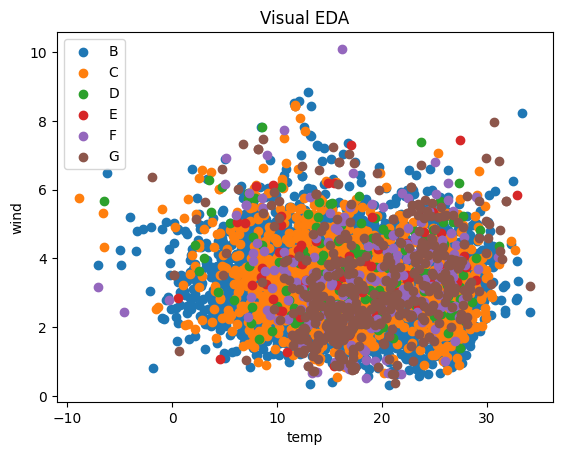

In [ ]:
plt.scatter(BData[BData.columns[0]], BData[BData.columns[1]], label='B')
plt.scatter(CData[CData.columns[0]], CData[CData.columns[1]], label='C')
plt.scatter(DData[DData.columns[0]], DData[DData.columns[1]], label='D')
plt.scatter(EData[EData.columns[0]], EData[EData.columns[1]], label='E')
plt.scatter(FData[FData.columns[0]], FData[FData.columns[1]], label='F')
plt.scatter(GData[GData.columns[0]], GData[GData.columns[1]], label='G')

plt.legend()
plt.xlabel("temp")
plt.ylabel("wind")
plt.title("Visual EDA")

Text(0.5, 1.0, 'B&G EDA')

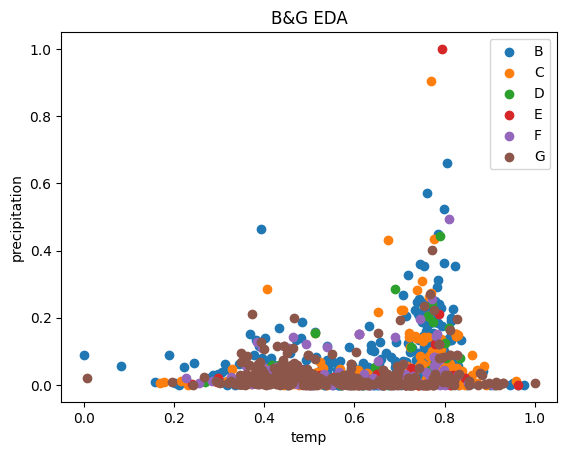

In [ ]:
plt.scatter(BData[BData.columns[0]], BData[BData.columns[3]], label='B')
plt.scatter(CData[CData.columns[0]], CData[CData.columns[3]], label='C')
plt.scatter(DData[DData.columns[0]], DData[DData.columns[3]], label='D')
plt.scatter(EData[EData.columns[0]], EData[EData.columns[3]], label='E')
plt.scatter(FData[FData.columns[0]], FData[FData.columns[3]], label='F')
plt.scatter(GData[GData.columns[0]], GData[GData.columns[3]], label='G')

plt.legend()
plt.xlabel("temp")
plt.ylabel("precipitation")
plt.title("B&G EDA")

Text(0.5, 1.0, 'B&G EDA')

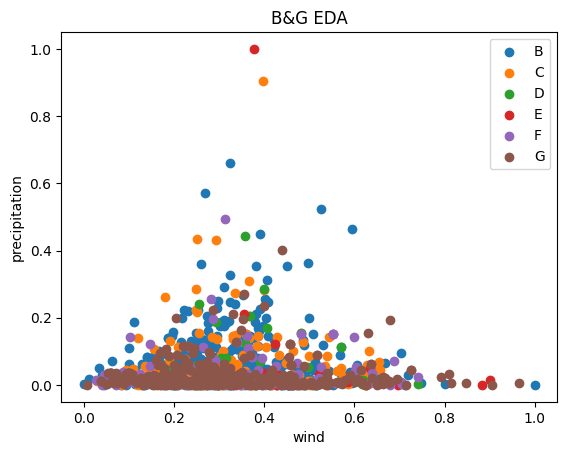

In [ ]:
plt.scatter(BData[BData.columns[1]], BData[BData.columns[3]], label='B')
plt.scatter(CData[CData.columns[1]], CData[CData.columns[3]], label='C')
plt.scatter(DData[DData.columns[1]], DData[DData.columns[3]], label='D')
plt.scatter(EData[EData.columns[1]], EData[EData.columns[3]], label='E')
plt.scatter(FData[FData.columns[1]], FData[FData.columns[3]], label='F')
plt.scatter(GData[GData.columns[1]], GData[GData.columns[3]], label='G')

plt.legend()
plt.xlabel("wind")
plt.ylabel("precipitation")
plt.title("B&G EDA")

Text(0.5, 1.0, ' EDA')

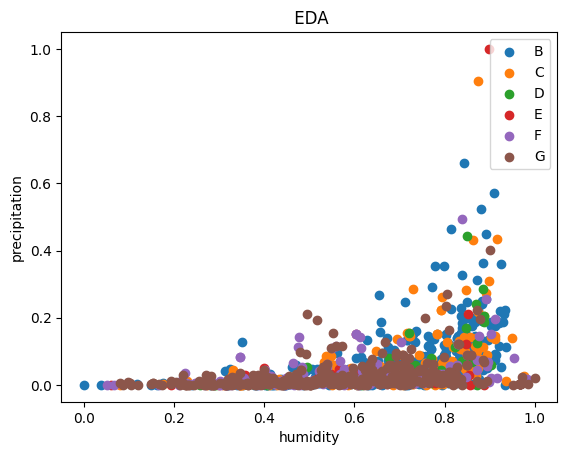

In [ ]:
plt.scatter(BData[BData.columns[2]], BData[BData.columns[3]], label='B')
plt.scatter(CData[CData.columns[2]], CData[CData.columns[3]], label='C')
plt.scatter(DData[DData.columns[2]], DData[DData.columns[3]], label='D')
plt.scatter(EData[EData.columns[2]], EData[EData.columns[3]], label='E')
plt.scatter(FData[FData.columns[2]], FData[FData.columns[3]], label='F')
plt.scatter(GData[GData.columns[2]], GData[GData.columns[3]], label='G')

plt.legend()
plt.xlabel("humidity")
plt.ylabel("precipitation")
plt.title(" EDA")

Text(0.5, 1.0, ' EDA')

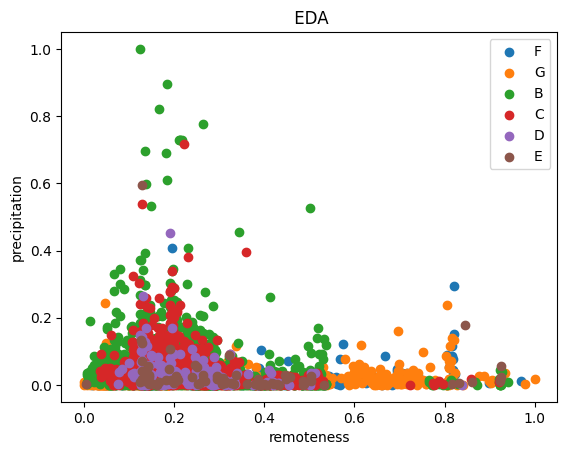

In [ ]:
plt.scatter(FData[FData.columns[4]], FData[FData.columns[3]], label='F')
plt.scatter(GData[GData.columns[4]], GData[GData.columns[3]], label='G')
plt.scatter(BData[BData.columns[4]], BData[BData.columns[3]], label='B')
plt.scatter(CData[CData.columns[4]], CData[CData.columns[3]], label='C')
plt.scatter(DData[DData.columns[4]], DData[DData.columns[3]], label='D')
plt.scatter(EData[EData.columns[4]], EData[EData.columns[3]], label='E')



plt.legend()
plt.xlabel("remoteness")
plt.ylabel("precipitation")
plt.title(" EDA")

# Modeling

In [ ]:
final_df

,fire_size_class,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
2,1,16,4.971930,0.269907,0.323068,0.524050,0.334996,0.285373,0.249849,0.311838,0.819076,0.806914,0.809731,0.670031,0.012426,0.029935,0.014243,0.058428,0.194544
7,0,12,16.851939,0.560861,0.678577,0.484270,0.100542,0.121121,0.114231,0.187010,0.785213,0.797028,0.823204,0.741335,0.002072,0.019433,0.000720,0.025921,0.241894
10,0,12,8.410983,0.353559,0.386403,0.538731,0.176348,0.151921,0.199559,0.146278,0.764132,0.726240,0.664131,0.770756,0.005605,0.018504,0.006482,0.018911,0.146888
28,0,4,5.181473,0.275636,0.375994,0.470082,0.294307,0.319090,0.361784,0.261068,0.730420,0.729611,0.654051,0.605798,0.003879,0.027220,0.001600,0.014207,0.094048
29,1,12,24.566175,0.782703,0.793242,0.801040,0.340728,0.324831,0.271583,0.235548,0.795743,0.791419,0.720392,0.826086,0.006888,0.060727,0.032888,0.072447,0.191512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55331,4,15,21.443127,0.703498,0.730525,0.608693,0.275342,0.204459,0.178442,0.265719,0.327234,0.319721,0.369996,0.477573,0.000125,0.001215,0.001360,0.004187,0.124757
55339,4,9,3.390566,0.222779,0.313710,0.408123,0.550100,0.607503,0.604910,0.525353,0.606197,0.630544,0.618044,0.559042,0.000302,0.002929,0.003041,0.005598,0.182660
55340,5,9,4.010314,0.245776,0.353790,0.407574,0.556206,0.642544,0.542239,0.511112,0.593218,0.611475,0.583323,0.568472,0.000302,0.002929,0.003041,0.005833,0.184977
55341,5,15,15.546194,0.454308,0.446754,0.501190,0.247781,0.235898,0.158088,0.201752,0.555048,0.641590,0.694043,0.592728,0.000745,0.007216,0.007282,0.003905,0.088821


In [ ]:
from sklearn.model_selection import train_test_split

target_data = final_df['fire_size_class']

feature_partial_data = final_df.iloc[:,[5,9,13,17,18]]
feature_data = final_df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X_train, X_test, y_train, y_test = train_test_split(feature_partial_data,target_data,test_size=0.3, random_state=0)

## Feature Selection
### Pearson's Correlation

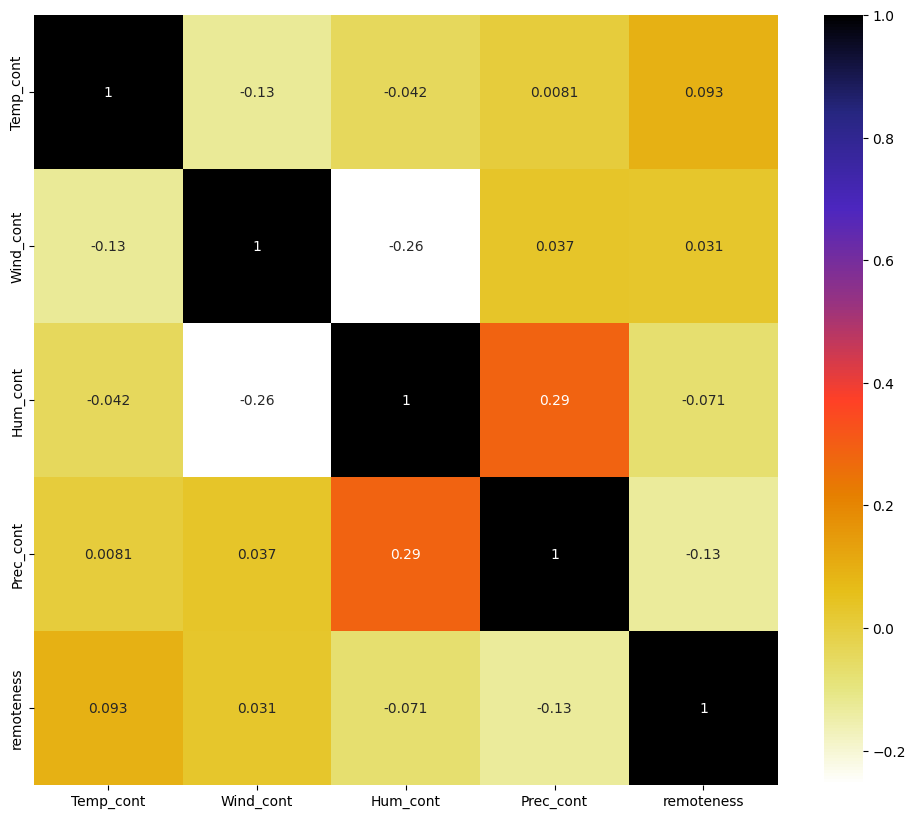

In [ ]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

### Using Models for Feature Selection

<function matplotlib.pyplot.show(close=None, block=None)>

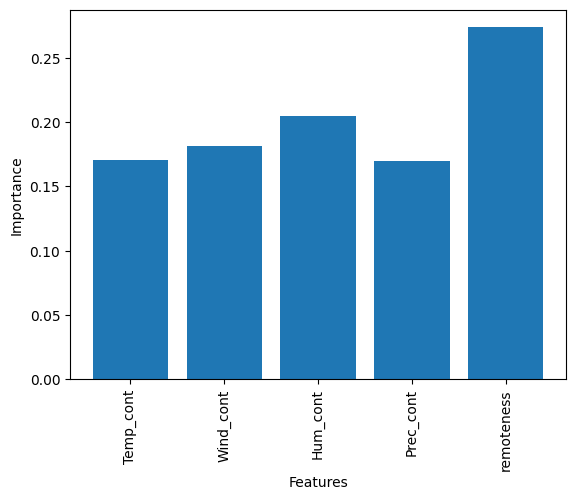

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

plt.bar(range(X_train.shape[1]), clf.feature_importances_)
bars = X_train.columns
plt.xticks(range(X_train.shape[1]), bars, rotation=90) #, , rotation=90, fontsize='10', horizontalalignment='right')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

## Modeling

In [ ]:
def train_test_split(feature,target,test_size,random_state):
  from sklearn.model_selection import train_test_split
  return train_test_split(feature,target,test_size=test_size, random_state=random_state)

def cross_val_score(model,X_train,y_train,cv):
  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(model, X_train, y_train, cv=cv)
  print("Cross Validation Score : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=9)

cross_val_score(knn,X_train,y_train,5)

knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Cross Validation Score : 0.67 (+/- 0.01)
Accuracy Score:  0.6903019213174748


SVC

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(kernel='rbf', gamma='auto')

cross_val_score(svc,X_train,y_train,5)

svc.fit(X_train, y_train)
preds = svc.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Cross Validation Score : 0.66 (+/- 0.00)
Accuracy Score:  0.6587374199451053


TREES

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### DT

In [ ]:
clf_tree = tree.DecisionTreeClassifier()
scores = cross_val_score(clf_tree, X_train, y_train, cv=5)

clf_tree.fit(X_train, y_train)
preds = clf_tree.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Cross Validation Score : 0.57 (+/- 0.01)
Accuracy Score:  0.5658737419945106


### Random Forest

In [ ]:
clf_rf = RandomForestClassifier()#n_estimators=330, criterion='log_loss', random_state=10, max_features=None)
scores_random = cross_val_score(clf_rf, X_train, y_train, cv=5)

clf_rf.fit(X_train, y_train)
preds = clf_rf.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Cross Validation Score : 0.69 (+/- 0.02)
Accuracy Score:  0.6985361390667887


### Gradient Boosted Trees

In [ ]:
clf_gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(clf_gradient, X_train, y_train, cv=5)

clf_gradient.fit(X_train, y_train)
preds = clf_gradient.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Cross Validation Score : 0.71 (+/- 0.01)
Accuracy Score:  0.7254476397178513


In [ ]:
clf_xgb = XGBClassifier()
scores_xgb = cross_val_score(clf_xgb, X_train, y_train, cv=5)

clf_xgb.fit(X_train, y_train)
preds = clf_xgb.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Cross Validation Score : 0.53 (+/- 0.07)
Accuracy Score:  0.565597667638484


In [ ]:
clf_xgb2 = XGBClassifier()
clf_xgb2 = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1, n_estimators=330)
clf_xgb2.fit(X_train, y_train)
preds = clf_xgb2.predict(X_test)
print("Accuracy Score: ", (sum(preds==y_test)/len(y_test)))

Accuracy Score:  0.5737704918032787


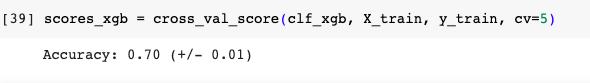

# Predictions

In [ ]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=9)
knn_model.fit(feature_partial_data, target_data)

cross_val_score(knn_model,feature_partial_data,target_data,5)

svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(feature_partial_data, target_data)

cross_val_score(svm_model,feature_partial_data,target_data,5)

rf_model = RandomForestClassifier()
rf_model.fit(feature_partial_data, target_data)

cross_val_score(rf_model,feature_partial_data,target_data,5)

Cross Validation Score : 0.67 (+/- 0.02)
Cross Validation Score : 0.66 (+/- 0.00)
Cross Validation Score : 0.69 (+/- 0.02)


In [ ]:
windC = 9
humC = .77

In [ ]:
md_30_data = {"Temp_cont": [87.8,91.1,89.9,90,90.6,89.3,90.2,90.3,90.9,89.6,81.8,89.7,90.2,90.8,90,90.6,90.6,90.1,90.3,90.7,89.6,90.3,89.1],
             "Wind_cont": [windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC],
             "Hum_cont": [humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC],
             "Prec_cont": [3.54,4.15,4.18,4.29,4.4,4.02,4.35,4.26,4.72,3.71,4.74,4.51,4.3,4.19,4.13,4.2,4.08,4.13,4.37,4.28,3.59,4.4,4.38],
             "remoteness": [0.7,0.09,0.09,0.7,0.99,0.7,0.99,0.4,0.99,0.4,0.99,0.2,0.4,0.99,0.09,0.09,0.99,0.7,0.4,0.99,0.4,0.4,0.7]
             #"remoteness": [0.2,0.99,0.99,0.2,0.09,0.2,0.09,0.4,0.09,0.4,0.09,0.7,0.4,0.09,0.99,0.99,0.09,0.2,0.4,0.09,0.4,0.4,0.2]
             }

md_50_data = {"Temp_cont": [90.8,93.9,92.7,92.9,93.2,92.2,93,93.1,93.6,92.5,84.8,92.7,92.9,93.5,92.8,93.5,93.2,92.4,93.2,93.3,92.5,92.7,91.5],
             "Wind_cont": [windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC,windC],
             "Hum_cont": [humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC,humC],
             "Prec_cont": [3.53,4.05,4.07,4.31,4.36,3.93,4.18,4.29,4.69,3.63,4.69,4.38,4.15,4.06,4.09,4.16,4,4.09,4.4,4.27,3.54,4.36,4.38],
             "remoteness": [0.7,0.09,0.09,0.7,0.99,0.7,0.99,0.4,0.99,0.4,0.99,0.2,0.4,0.99,0.09,0.09,0.99,0.7,0.4,0.99,0.4,0.4,0.7]
             }

In [ ]:
md30_df = pd.DataFrame(md_30_data)
md50_df = pd.DataFrame(md_50_data)

funcTemp = lambda x : (5/9)*(x-32)
funcPrec = lambda x : 25.4*x

for c in md30_df.columns:
  if c == 'Temp_cont':
    md30_df[c] = funcTemp(md30_df[c])
    md50_df[c] = funcTemp(md50_df[c])
  elif c == 'Prec_cont':
    md30_df[c] = funcPrec(md30_df[c])
    md50_df[c] = funcPrec(md50_df[c])

md30_df

,Temp_cont,Wind_cont,Hum_cont,Prec_cont,remoteness
0,31.000000,9,0.77,89.916,0.70
1,32.833333,9,0.77,105.410,0.09
2,32.166667,9,0.77,106.172,0.09
3,32.222222,9,0.77,108.966,0.70
4,32.555556,9,0.77,111.760,0.99
5,31.833333,9,0.77,102.108,0.70
6,32.333333,9,0.77,110.490,0.99
7,32.388889,9,0.77,108.204,0.40
8,32.722222,9,0.77,119.888,0.99
9,32.000000,9,0.77,94.234,0.40


In [ ]:
min_max_metrics = metric.copy()
metricsIdx = 0
for column in md30_df.columns:
  min, max = min_max_metrics[metricsIdx], min_max_metrics[metricsIdx+1]
  md30_df[column] = (md30_df[column] - min)/(max - min)
  md50_df[column] = (md50_df[column] - min)/(max - min)
  metricsIdx+=2

In [ ]:
knn30, svm30, rf30 = knn.predict(md30_df), svc.predict(md30_df), clf_rf.predict(md30_df)
knn50, svm50, rf50 = knn.predict(md50_df), svc.predict(md50_df), clf_rf.predict(md50_df)

print(knn30)
print(svm30)
print(rf30)

[0 5 5 0 0 0 0 5 0 5 0 5 5 0 5 5 0 0 5 0 5 5 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[5 4 4 5 5 5 5 5 5 5 5 5 5 5 4 4 5 5 5 5 5 5 5]


In [ ]:
knn30, svm30, rf30 = knn_model.predict(md30_df), svm_model.predict(md30_df), rf_model.predict(md30_df)
print(knn30)
print(svm30)
print(rf30)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 5 5 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
